In [27]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [28]:
images = os.listdir('C:/Users/Xueho/PD_segment/small/training/')
png_list = []
for image in images:
    if image[-3:] == 'png':
        png_list.append(image) # read only png files
print(len(png_list))
print(png_list[0:4])

1147
['ADE_train_00000191_seg.png', 'ADE_train_00000341_seg.png', 'ADE_train_00000557_seg.png', 'ADE_train_00000561_seg.png']


### check sample image

In [30]:
cd C:\Users\Xueho\PD_segment\small\training

C:\Users\Xueho\PD_segment\small\training


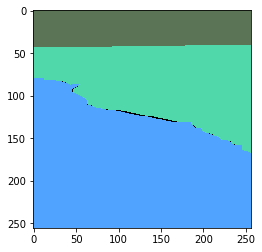

In [38]:
# check sample image
image = mpimg.imread(png_list[0])
plt.imshow(image)

### construct gray scale matrix for all png images

In [24]:
from skimage import io
img_list =[]
for item in png_list:
    image = io.imread(item, as_grey=True)
    pix = np.array(image)
    img_list.append(pix)
print(len(img_list))

1147


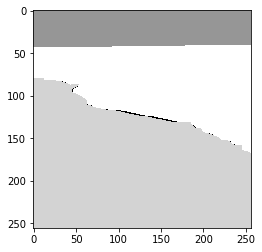

In [39]:
plt.imshow(img_list[0], cmap=plt.get_cmap('gray'))

In [ ]:
!pip install opencv-python

In [45]:
import cv2
# Create a custom kernel, 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(img_list[0], -1, sobel_y)
print(filtered_image)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


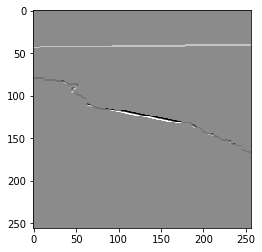

In [46]:
plt.imshow(filtered_image, cmap=plt.get_cmap('gray'))

In [ ]:
# Create second kernel for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(img_list[0], -1, sobel_y)